**Autor: Gustavo Henrique Reis de Araújo Lima**

**Instituição: CEFET - MG - Unidade Contagem**

**(feito em Julia 1.4)**

**Última atualização: 05/05/2020**

**Requisitos: Plots.jl, LaTeXStrings.jl**

***

# **1. Cinemática**

## **1.2 Movimento Retilíneo Uniforme (MRU)**

### **1.2.3 Exemplos**

A animação a seguir mostra o movimento de um certo objeto ao longo da direção x, e abaixo o gráfico de posição em função do tempo correspondente para o objeto.

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
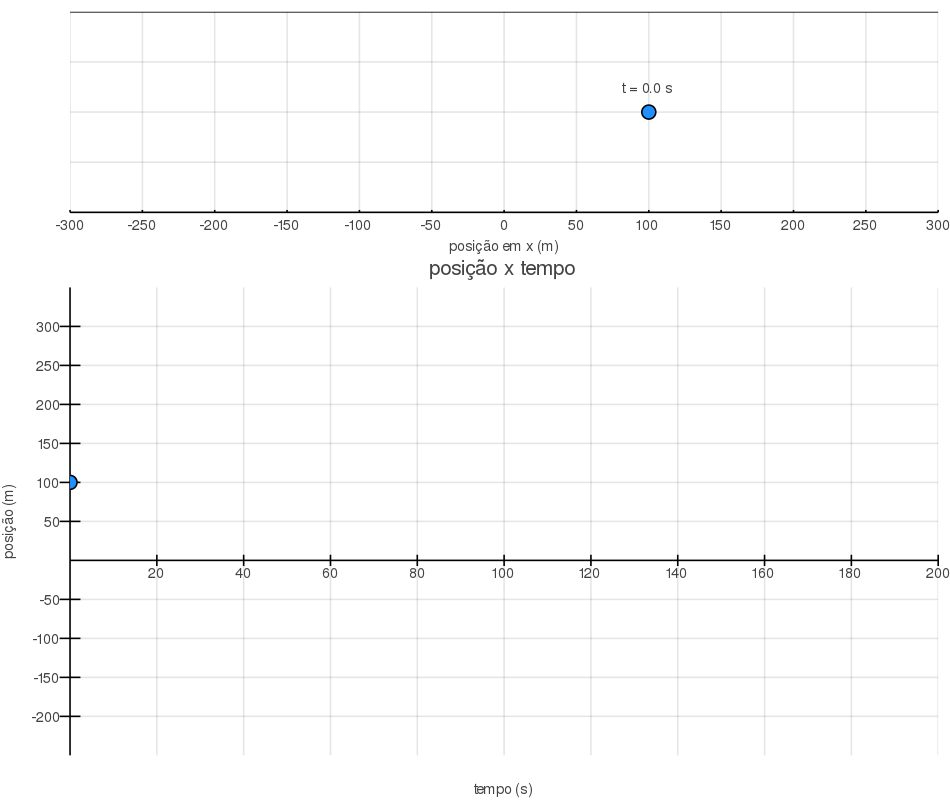

In [2]:
using Plots
using LaTeXStrings
using Printf

#função que define a posição do objeto no instante t
function xpos(t::Real)
    if t < 0
        return 100
    elseif 0 <= t < 20
        return -15*t + 100
    elseif 20 <= t < 40
        return -200
    elseif 40 <= t < 80
        return 12.5 * t - 700
    elseif 80 <= t < 160
        return -3.75 * t + 600
    else
        return 0
    end
end

#definindo características do gráfico
default(size = [800,600], grid = true, markersize = 8, framestyle = :origin)

#vetor com os instantes de tempo para montar o gráfico
t = 0:0.5:200

#definindo posição fixa do objeto no eixo y
ypos = zeros(size(t, 1))

#criando animação
@gif for i = 1:size(t,1)
    #anotação de tempo acima do objeto em movimento
    ann_t = [(xpos(t[i]), 2.5, text(@sprintf("t = %3.1f s", t[i]), pointsize = 10, halign = :center))]
    #objeto circular em movimento
    p1 = scatter([xpos(t[i])], [0], xaxis =("posição em x (m)", (-300, 300), -300:50:300, font(10)),
        ylims = (-10,10), yaxis = (showaxis = :off), legend = :none, 
        marker = :circle, color = :dodgerblue, framestyle = :box, ann = ann_t)
    
    #criando rastro do objeto
    if i < 21
        plot!([xpos.(t[1:i])], [ypos[1:i]], lw = range(1,15, length = i+1), color = :dodgerblue, 
            alpha = range(0,1, length = i+1))
    else
        plot!([xpos.(t[i-20:i])], [ypos[i-20:i]], lw = range(1,15, length = 21), 
            color = :dodgerblue, alpha = range(0,1, length = 21))
    end
        
    #gráfico de posiçao x tempo animado
    p2 = scatter([t[i]],[xpos(t[i])], xaxis = ("tempo (s)", (0,200), 0:20:200, font(10)),
            yaxis = ("posição (m)", (-250, 350), -200:50:300, font(10)), legend = :none, 
            marker = :circle, color = :dodgerblue, title = "posição x tempo") 
    
    plot!([t[1:i]],[xpos.(t[1:i])], xaxis = ("tempo (s)", (0,200), 0:20:200, font(10)), lw = 3,
            yaxis = ("posição (m)", (-250, 350), -200:50:300, font(10)), legend = :none, 
            title = "posição x tempo", color = :dodgerblue)
    
    #desenhando os dois gráficos um acima do outro
    plot(p1,p2, layout = grid(2,1, heights = [0.3, 0.7]), size = (950,800))
end

O movimento do objeto no intervalo representado no gráfico de posição x tempo acima não pode ser descrito como movimento retilíneo uniforme. Mas, em alguns intervalos, podemos notar que a velocidade do objeto é constante: 

* $0\,{\rm s} < t \leq 20\,{\rm s}$: a velocidade é constante e negativa;
* $40\,{\rm s} < t \leq 80\,{\rm s}$ : a velocidade é constante e positiva;
* $80\,{\rm s} < t \leq 160\,{\rm s}$ : a velocidade é constante e negativa.

O objeto permanece parado no intervalo $20\,{\rm s} < t \leq 40\,{\rm s}$, e também após $t = 160\,{\rm s}$.

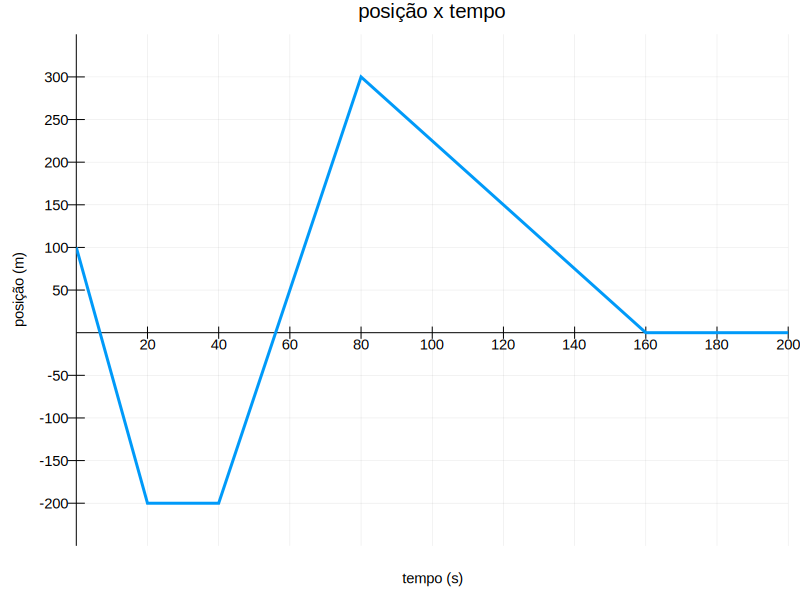

In [3]:
#desenhando gráfico estático da posição em função do tempo
p1 = plot(t,xpos.(t), xaxis = ("tempo (s)", (0,200), 0:20:200, font(10)), lw = 3,
    yaxis = ("posição (m)", (-250, 350), -200:50:300, font(10)), legend = :none, title = "posição x tempo")
plot(p1)

Analisando as inclinações das retas no gráfico de posição x tempo, pode-se montar um gráfico que descreve a velocidade do objeto no intervalo acima.

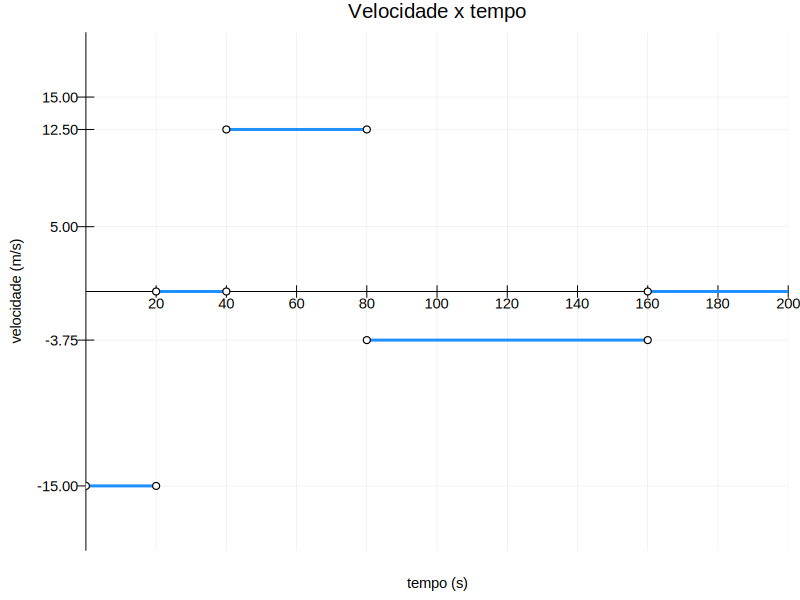

In [4]:
#calculando a velocidade no intervalo 1: 0 < t <= 20s
t1 = 5; t2 = 10
v1 = (xpos(t2) - xpos(t1))/(t2 - t1)

#calculando a velocidade no intervalo 2: 40 < t <= 80s
t1 = 50; t2 = 70
v2 = (xpos(t2) - xpos(t1))/(t2 - t1)

#calculando a velocidade no intervalo 3: 80 < t <= 160s
t1 = 90; t2 = 120
v3 = (xpos(t2) - xpos(t1))/(t2 - t1)

#desenhando gráfico de velocidade x tempo
p2 = plot([0,20],[v1,v1], xaxis = ("tempo (s)", (0, 200), 0:20:200, font(10)), 
    yaxis = ("velocidade (m/s)", (-20, 20), [-15, -3.75, 0, 5, 12.5, 15], font(10)),
    lw = 3, marker = ([:circle], 4, :white), legend = :none, color = :dodgerblue,
    title = "Velocidade x tempo")

plot!([20,40],[0,0], lw = 3, marker = ([:circle], 4, :white), color = :dodgerblue)
plot!([40,80],[v2,v2], lw = 3, marker = ([:circle], 4, :white), color = :dodgerblue)
plot!([80,160],[v3,v3], lw = 3, marker = ([:circle], 4, :white), color = :dodgerblue)
plot!([160,200],[0,0], lw = 3, marker = ([:circle], 4, :white), color = :dodgerblue)

plot(p2)

Os pequenos círculos limitando os intervalos de tempo indicam que a velocidade não é definida nesses pontos. Os gráficos de posição x tempo e velocidade x tempo apresentam discontinuidades nesses pontos. Mas podemos ver como a velocidade varia dentro do intervalo acima nos outros pontos.

Abaixo, podemos ver os dois gráficos representados simultaneamente.

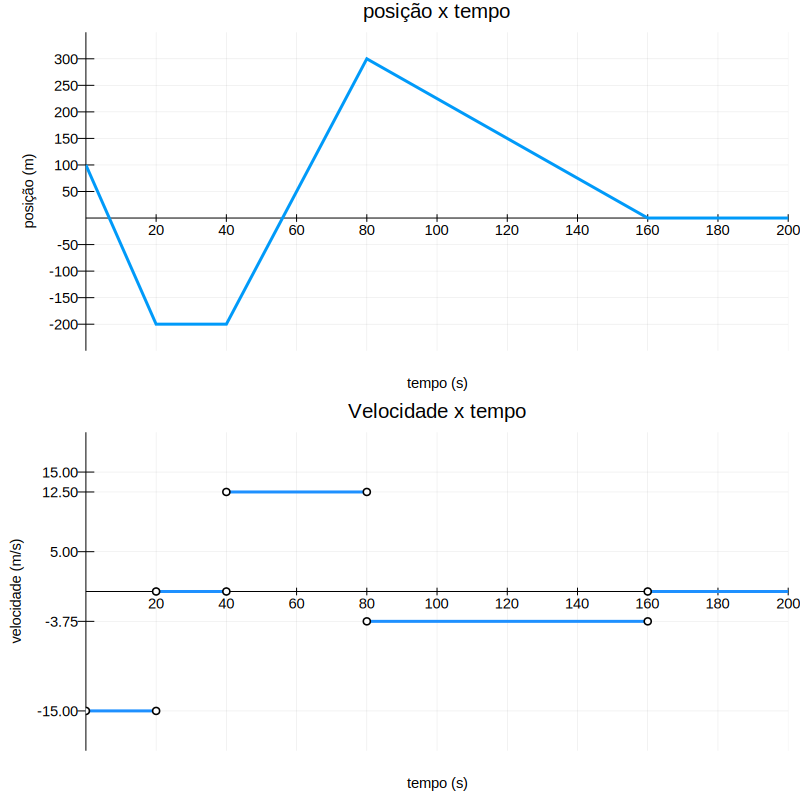

In [5]:
plot(p1,p2, layout = (2,1), size = (800,800))

Como o movimento total não é um movimento retilíneo e uniforme, não podemos mais dizer que a distância percorrida $D$ é o módulo do deslocamento $\Delta s$ do objeto; e nem que a velocidade média $v_{\rm med}$ é igual a velocidade do objeto em todos os instantes de tempo! Devemos utilizar a definição de velocidade média para calculá-la:

$$v_{\rm med} = \frac{\Delta s}{\Delta t},$$

e será diferente para diferentes pontos escolhidos. A rapidez média ${\rm rpd_{med}}$ também não é o módulo da velocidade média $v_{\rm med}$. A rapidez média deve ser calculada a partir da distância total percorrida $D$:

$${\rm rpd_{med}} = \frac{D}{\Delta t},$$

e também será diferente para cada par de pontos escolhidos para o cálculo.

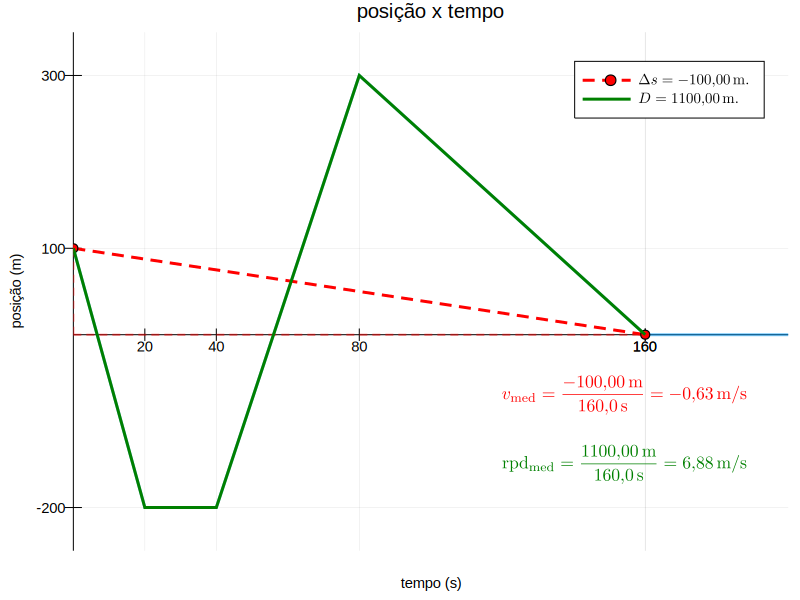

In [9]:
#limites para os cálculos de deslocamento, distância percorrida, velocidade média e rapidez média
t1 = 0; t2 = 160

#deslocamento e velocidade média entre t1 e t2
Δs = xpos(t2)-xpos(t1)
vmed = Δs/(t2 - t1)

#cálculo da distância percorrida (D) entre t1 e t2
#inicializando distância percorrida D
D = 0
#valor do intervalo entre dois instantes de tempo consecutivos
dt = 1
#inicializando o limite inferior da soma
i = t1
#calcula os deslocamentos entre 2 instantes vizinhos separados por dt, e soma os valores absolutos
#desses deslocamentos para se encontrar a distância percorrida D.
while i < t2
    dD = xpos(i+dt)-xpos(i)
    D = D + abs(dD)
    i += dt
end
#calcula a rapidez média
rpdmed = D/(t2-t1)

#vetor de tempo para o intervalo entre t1 e t2
ttemp = t1:dt:t2

#string de deslocamento
Δsstr = @sprintf("%4.2f", Δs)
deslstr = latexstring("\\Delta s = ", Δsstr, "\\,{\\rm m}.")
deslstr = replace(deslstr, "." => ",\\!", count = 1)

#string de distância percorrida
Dstr = @sprintf("%4.2f", D)
diststr = latexstring("D = ", Dstr, "\\,{\\rm m}.")
diststr = replace(diststr, "." => ",\\!", count = 1)

#string de velocidade média
Δtstr = @sprintf("%4.1f", (t2 - t1))
vmedstr = @sprintf("%2.2f", vmed)
vstr = latexstring("v_{\\rm med} = \\frac{", Δsstr, "\\,{\\rm m}}{", Δtstr, "\\,{\\rm s}} = ", 
    vmedstr, "\\,{\\rm m/s}")
vstr = replace(vstr, "." => ",\\!")

#string de velocidade média
rpdmstr = @sprintf("%2.2f", rpdmed)
rpdstr = latexstring("{\\rm rpd_{med}} = \\frac{", Dstr, "\\,{\\rm m}}{", Δtstr, "\\,{\\rm s}} = ", 
    rpdmstr, "\\,{\\rm m/s}")
rpdstr = replace(rpdstr, "." => ",\\!")

#anotações com cálculo da velocidade média e rapidez média
ann_v = [(120,-70, text(vstr, pointsize = 12, color = :red, halign = :left)),
    (120,-150, text(rpdstr, pointsize = 12, color = :green, halign = :left))]

#marcações dos eixos x e y
yticks = [-200, 0, 300, xpos(t1), xpos(t2)]
xticks = [20, 40, 80, 160, t1, t2]

#gráfico da posição x tempo - trajetória completa
plot(t,xpos.(t), xaxis = ("tempo (s)", (0,200), xticks, font(10)), lw = 3, alpha = 0.5,
    yaxis = ("posição (m)", (-250, 350), yticks, font(10)), title = "posição x tempo", label = :none,
    legendfontsize = 10)

#linha mostrando o deslocamento entre t1 e t2
plot!([t1,t2],[xpos(t1),xpos(t2)], lw = 3, ls = :dash, color = :red, marker = (:circle, 5), label = deslstr)

#localizando ponto t1,s1
plot!([0,t1],[xpos(t1),xpos(t1)], lw = 2, ls = :dash, color = :red, alpha = 0.5, label = :none)
plot!([t1,t1],[0,xpos(t1)], lw = 2, ls = :dash, color = :red, alpha = 0.5, label = :none)

#localizando ponto t2,s2
plot!([0,t2],[xpos(t2),xpos(t2)], lw = 2, ls = :dash, color = :red, alpha = 0.5, label = :none)
plot!([t2,t2],[0,xpos(t2)], lw = 2, ls = :dash, color = :red, alpha = 0.5, label = :none)

#gráfico de posição x tempo dentro do intervalo entre t1 e t2
plot!(ttemp, xpos.(ttemp), lw = 3, color = :green, label = diststr, ann = ann_v)



O deslocamento, como visto anteriormente, não depende do caminho percorrido, só depende das posições iniciais e finais dentro do intervalo analisado, e é calculado como: $\Delta s = s_f - s_i.$ Já a distância percorrida depende de todo o caminho percorrido pelo objeto no intervalo analisado, por exemplo, a distância percorrida no intervalo mostrado no gráfico é: 

D = 300 m (entre 0 e 20 s) + 500 m (entre 40 s e 80 s) + 300 m (entre 80 s e 160 s) = 1100 m.

Acima podemos ver, através da análise do gráfico da posição x tempo, como o deslocamento, velocidade média, distância percorrida e rapidez média mudam de acordo com os instantes escolhidos. Podemos fazer o mesmo tipo de análise utilizando o gráfico de velocidade x tempo.

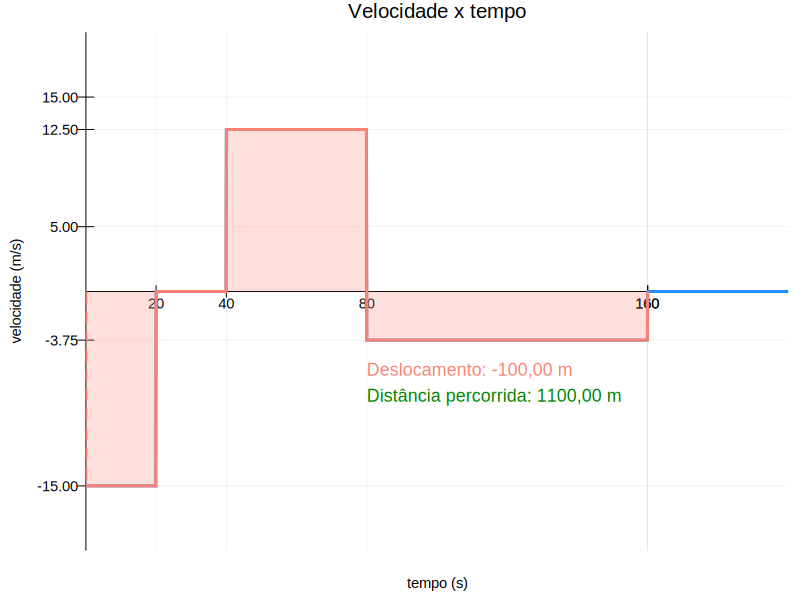

In [6]:
#limites para os cálculos de deslocamento, distância percorrida, velocidade média e rapidez média
t1 = 0; t2 = 160

#redefinindo a vetor com valores de tempo, o intervalo entre dois instantes consecutivos foi diminuido
#para que ao se desenhar o gráfico, as retas nas discontinuidades sejam o mais vertical possível, e não
#se perceba uma reta inclinada
t = 0:0.1:200

#função que define a velocidade em função do tempo v(t)
function xvel(t::Real)
    if t < 0
        return 0
    elseif 0 <= t < 20
        return -15
    elseif 20 <= t < 40
        return 0
    elseif 40 <= t < 80
        return 12.5
    elseif 80 <= t < 160
        return -3.75
    elseif t >= 160
        return 0
    end
end

#definindo diferencial dt para integração numérica
#o valor foi escolhido de modo que o resultado obtido com a integração fosse o mesmo
#que o obtido pela análise do gráfico de posição x tempo. Apesar de v(t) ser uma função com
#vários degraus, como a função é discontinua, ocorrem pequenos erros no cálculo da área perto 
#dos pontos de discontinuidade, por isso, quanto menor o dt, menor são esses erros.
dt = 0.01
#valores de t dentro do intervalo entre t1 e t2
dt2 = 0.1
ttemp = t1:dt2:t2
#definindo marcações no eixo do tempo
xticks = [20, 40, 80, 160, t1, t2]

#inicializando a variável de deslocamento
Δsv = 0
#inicializando a variável de distância percorrida
Dv = 0
#inicializando a variável de limite inferior de integração
i = t1

#calculando a integral de v(t)
#eu sei que para este caso resolver uma integração numérica é um canhão pra matar uma formiga, 
#mas dessa forma não é necessário se preocupar com a forma da função v(t). A função xvel definida 
#acima pode ser redefinida de qualquer forma, que será possível obter um resultado preciso no 
#cálculo da área do gráfico
while i < t2
    ds = xvel(i+dt/2)*dt
    Δsv = Δsv + ds
    Dv = Dv + abs(ds)
    i += dt
end

#string de deslocamento
deslocvstr = @sprintf("Deslocamento: %4.2f m", Δsv)
#desloctext = latexstring("\\Delta s = ", deslocvstr, "\\,{\\rm m}}")
deslocvstr = replace(deslocvstr, "." => ",")

#string de distância percorrida
Dvstr = @sprintf("Distância percorrida: %4.2f m", Dv)
#Dvtext = latexstring("D = ", Dvstr, "\\,{\\rm m}}")
Dvstr = replace(Dvstr, "." => ",")

#definindo posições e características das anotações
ann_dd = [(80, -6, text(deslocvstr, pointsize = 12, halign = :left, color = :salmon)),
    (80, -8, text(Dvstr, pointsize = 12, halign = :left, color = :green))]

#gráfico da velocidade em função do tempo v(t)
plot(t, xvel.(t), xaxis = ("tempo (s)", (0, 200), xticks, font(10)), 
    yaxis = ("velocidade (m/s)", (-20, 20), [-15, -3.75, 0, 5, 12.5, 15], font(10)),
    lw = 3, legend = :none, color = :dodgerblue,
    title = "Velocidade x tempo")

#gráfico de v(t) dentro do intervalo entre t1 e t2
plot!(ttemp, xvel.(ttemp), lw = 3, fill = (0, :salmon), fillalpha = 0.25, color = :salmon)
#localizando instante de tempo inicial t1
plot!([t1,t1],[0,xvel(t1)], lw = 3, ls = :dash, color = :salmon)
#localizando instante de tempo final t2
plot!([t2,t2],[0,xvel(t2)], lw = 3, ls = :dash, color = :salmon)
annotate!(ann_dd)


Como já foi visto anteriormente, calculando as áreas entre as retas que definem a velocidade e o eixo do tempo, limitadas pelos limites do intervalo, é possível encontrar o deslocamento e a distância percorrida. No caso do deslocamento, devemos levar em consideração se a área é positiva ou negativa - áreas acima do eixo do tempo são positivas e áreas abaixo do eixo do tempo são negativas. Somando todas as áreas positivas e negativas encontramos o deslocamento. Podemos ter uma área total positiva ou negativa. Já, ao se calcular a distância percorrida, consideramos **o módulo das áreas**, ou seja, todas as áreas são positivas. A distância percorrida é a soma do módulo de todas as áreas, portanto, deve ser um valor positivo.

Como esperado, o deslocamento e distância percorrida são os mesmos quando calculados utilizando o gráfico de posição x tempo e o gráfico de velocidade x tempo. E é importante notar as diferenças entre deslocamento e distância percorrida, e entre velocidade média e rapidez média. 

### **1.2.4 - Resumo**

* Deslocamento: $\Delta s = s_f - s_i$, onde $s_f$ é a posição final e $s_i$ a posição inicial.

* Intervalo de tempo: $\Delta t = t_f - t_i$, onde $t_f$ é o instante de tempo final e $t_i$ o instante de tempo inicial. 

* Posição no instante $t=0$: $s_0$.

* No MRU, a distância percorrida $D$ é igual ao módulo do deslocamento $\Delta s$. Mas isso não ocorre em todo tipo de movimento como visto na seção 1.5.3.

* Equação da posição em função do tempo: 

$$s(t) = v\cdot t + s_0.$$

* Velocidade é a inclinação da reta no gráfico de posição x tempo.

$$ v = \frac{\Delta s}{\Delta t} = {\rm constante}.$$

* Velocidade média é sempre igual à velocidade do objeto no MRU.

* Deslocamento é igual a área sob a reta que representa a velocidade no gráfico de velocidade x tempo.

* Deslocamento em um intervalo $\Delta t$: 

$$\Delta s = v\cdot \Delta t.$$

* Em qualquer tipo de movimento, a velocidade média em um intervalo $\Delta t$ é sempre:

$$\overrightarrow{v}_{\!\rm med} = \frac{\overrightarrow{\Delta s}}{\Delta t}.$$

* A rapidez média em um intervalo $\Delta t$ é sempre:

$${\rm rap_{med}} = \frac{D}{\Delta t}.$$